In [1]:
import pandas as pd

# 링크에서 읽어오기
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=0) #random state를 다른 상수를 줘서 항상 같은 결과를 내도 되고..

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [9]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

# decision tree는 전처리를 하나 안하나 같다.
# 전처리 한것으로 진행
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

# 전처리 안한 것으로 진행
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))



print(train_input, train_target)

0.9974985568597268
0.8707692307692307
0.9974985568597268
0.8723076923076923
[[13.5   1.3   3.26]
 [ 8.7  22.    2.93]
 [ 8.9  16.    3.22]
 ...
 [ 9.1   0.9   3.05]
 [10.3   1.2   3.37]
 [10.    2.3   2.99]] [1. 1. 1. ... 1. 1. 1.]


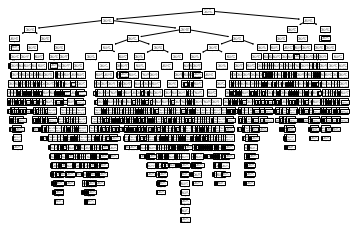

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#plot_tree(dt)
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

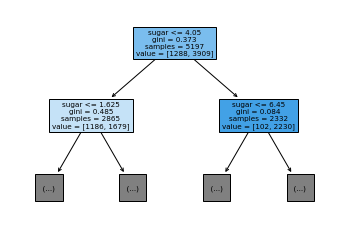

In [12]:
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [14]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.feature_importances_)

[0.11428431 0.87948229 0.0062334 ]
